## Importing files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading datasets

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory data analysis

<Axes: ylabel='count'>

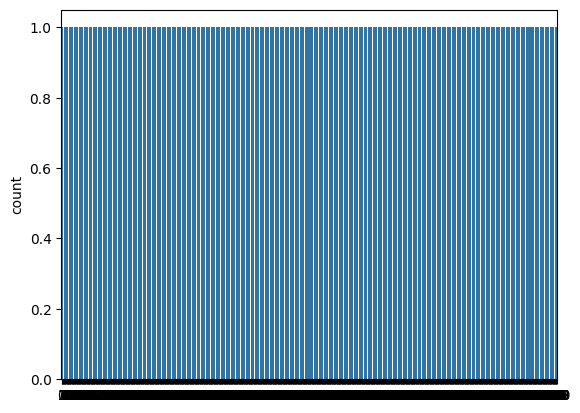

In [6]:
sns.countplot(train['Survived'])

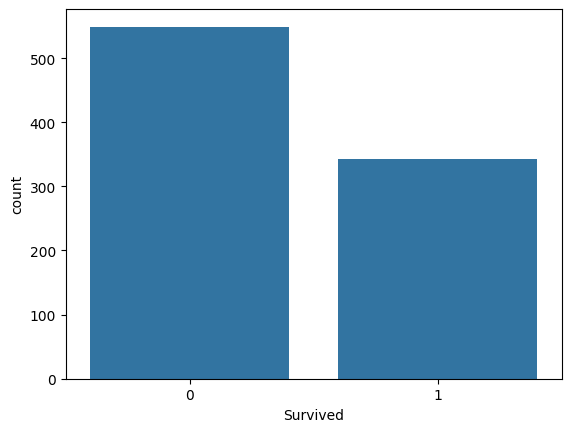

In [7]:
sns.countplot(x='Survived', data=train)
plt.show()

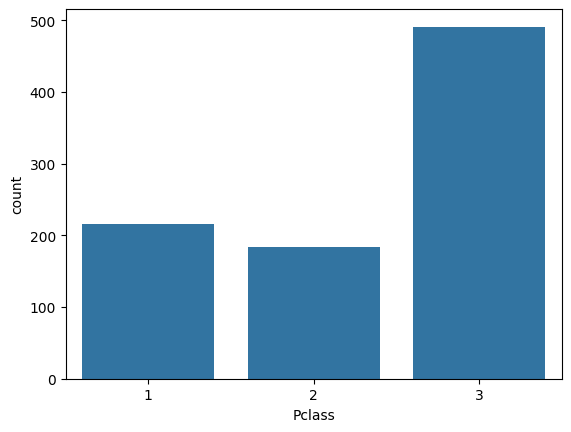

In [10]:
sns.countplot(x='Pclass', data=train)
plt.show()

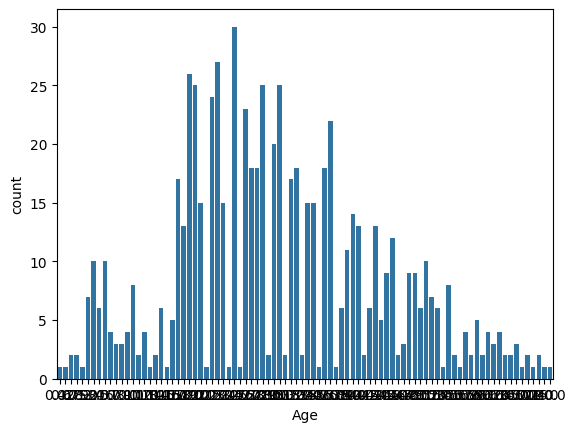

In [11]:
sns.countplot(x='Age',data=train)
plt.show()

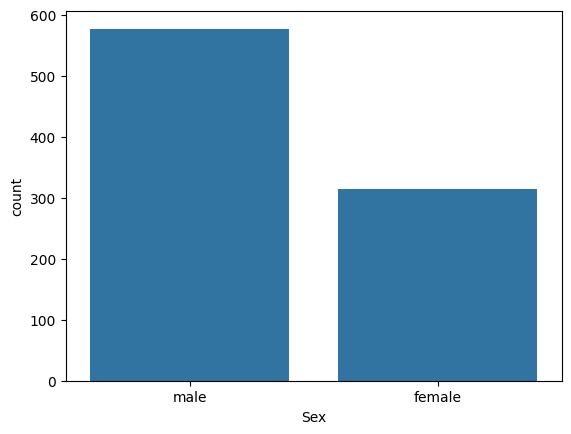

In [12]:
sns.countplot(x='Sex',data=train)
plt.show()

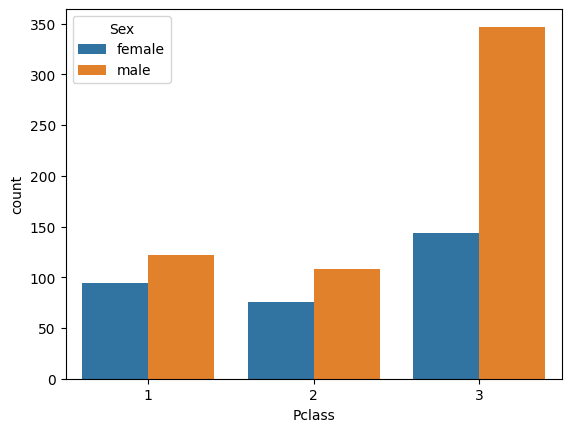

In [13]:
sns.countplot(x='Pclass', hue='Sex', data=train)
plt.show()

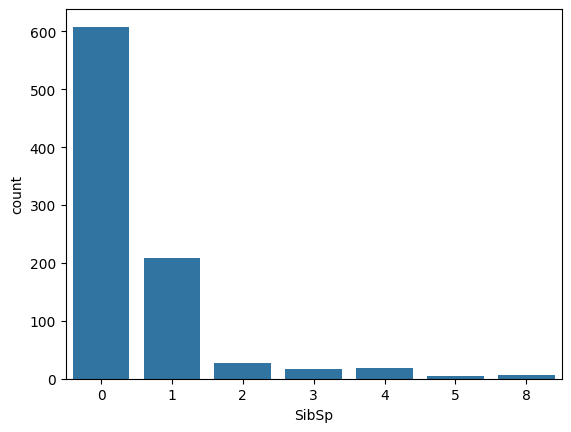

In [15]:
sns.countplot(x='SibSp',data=train)
plt.show()

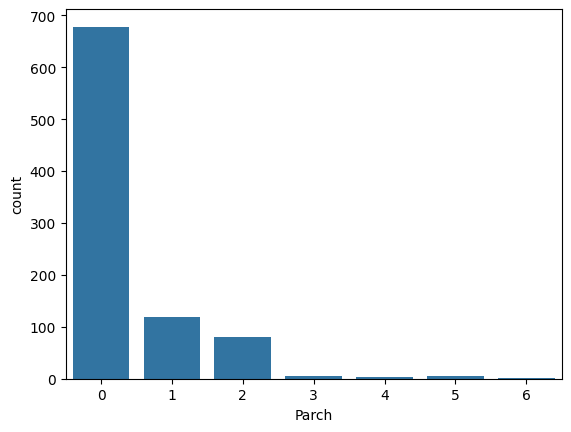

In [16]:
sns.countplot(x='Parch',data=train)
plt.show()

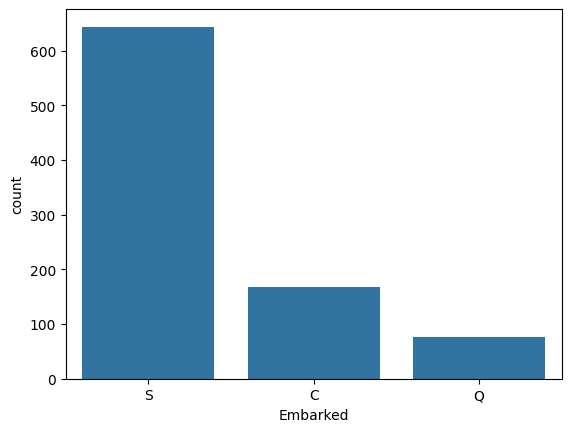

In [17]:
sns.countplot(x='Embarked',data=train)
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

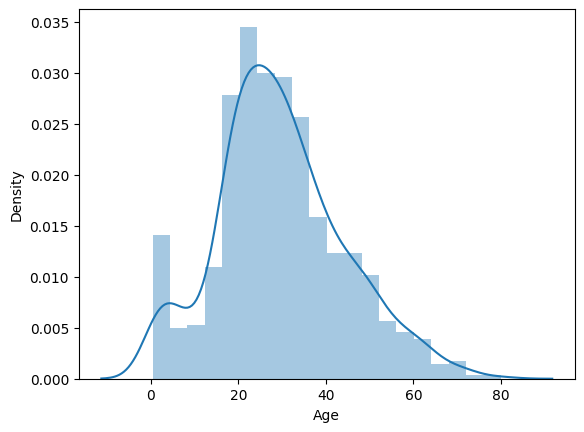

In [18]:
sns.distplot(train['Age'])


<Axes: xlabel='Fare', ylabel='Density'>

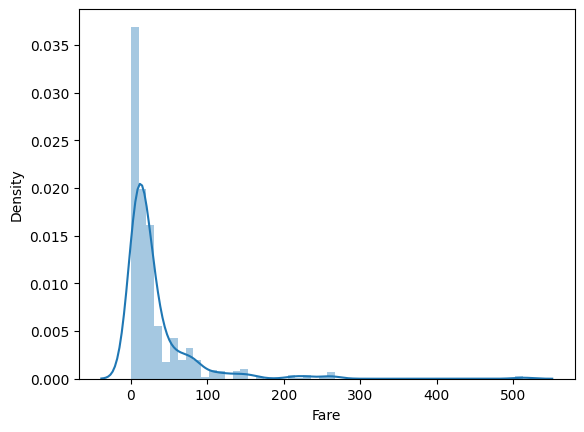

In [19]:
sns.distplot(train['Fare'])

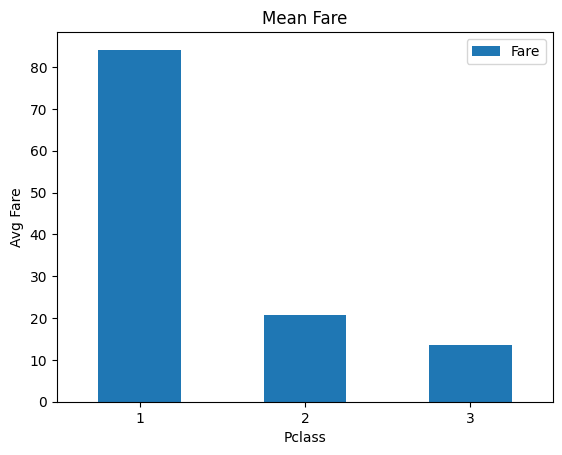

In [22]:
class_fare=train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.title('Mean Fare')
plt.xlabel('Pclass')
plt.ylabel('Avg Fare')
plt.xticks(rotation=0)
plt.show()

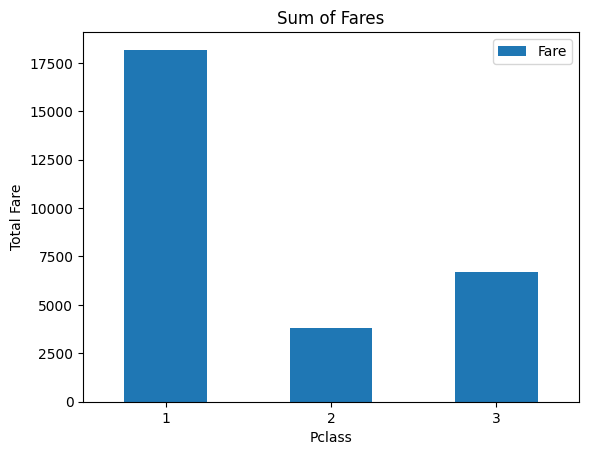

In [23]:
class_fare=train.pivot_table(index='Pclass', values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.title('Sum of Fares')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

## Data preprocessing

In [27]:
df = pd.concat((train,test),axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [29]:
## to find the sum of null values
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


In [30]:
df = df.drop(columns=['Cabin'],axis=0)

In [31]:
df['Age'].mean()

np.float64(29.881137667304014)

In [33]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)


In [34]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

## Log transformation for uniform distribution

<Axes: xlabel='Fare', ylabel='Density'>

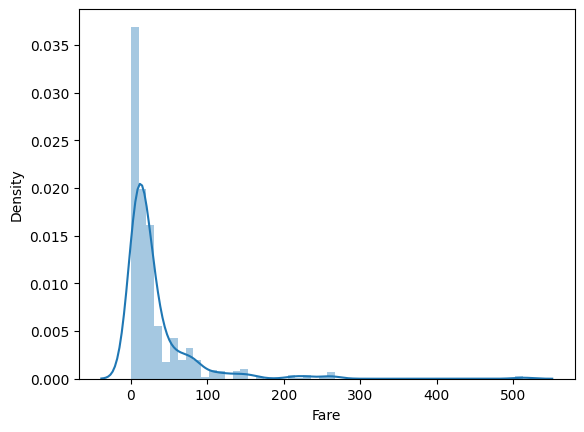

In [36]:
sns.distplot(train['Fare'])

In [43]:
df['Fare']=np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

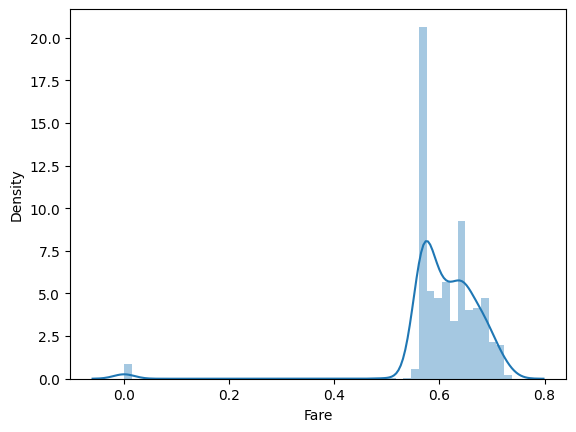

In [45]:
sns.distplot(df['Fare'])

## Correlation matrix

In [47]:
corr= df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

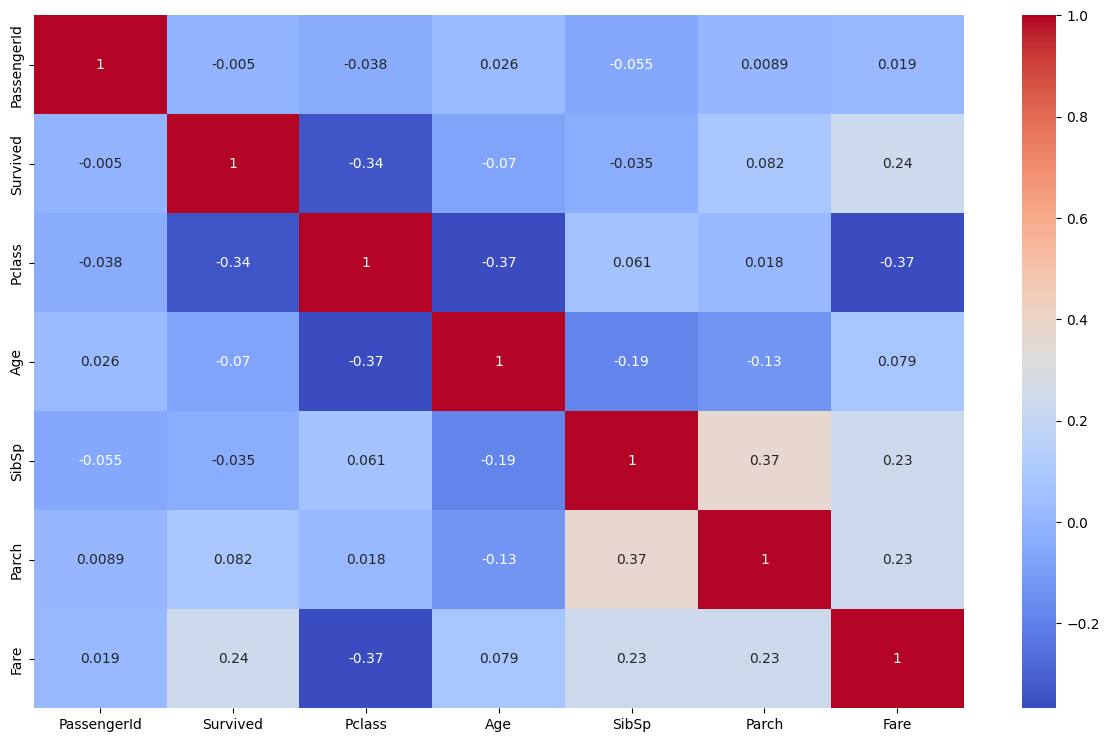

In [49]:
# Drop non-numeric columns before calculating correlation
df_numeric = df.drop(columns=['Name', 'Ticket', 'Embarked', 'Sex'])

corr = df_numeric.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [50]:
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,0.564360,S
1,2,1.0,1,female,38.0,1,0,0.683018,C
2,3,1.0,3,female,26.0,0,0,0.570952,S
3,4,1.0,1,female,35.0,1,0,0.672144,S
4,5,0.0,3,male,35.0,0,0,0.572089,S


## Label encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le=LabelEncoder()

for col in cols:
  df[col]=le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,0.564360,2
1,2,1.0,1,0,38.0,1,0,0.683018,0
2,3,1.0,3,0,26.0,0,0,0.570952,2
3,4,1.0,1,0,35.0,1,0,0.672144,2
4,5,0.0,3,1,35.0,0,0,0.572089,2


## Train Test Split

In [54]:
train_len=len(train)
train=df.iloc[0:train_len,:]
test=df.iloc[train_len:,:]
print(train)
print(test)

     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch      Fare  \
0              1       0.0       3    1  22.000000      1      0  0.564360   
1              2       1.0       1    0  38.000000      1      0  0.683018   
2              3       1.0       3    0  26.000000      0      0  0.570952   
3              4       1.0       1    0  35.000000      1      0  0.672144   
4              5       0.0       3    1  35.000000      0      0  0.572089   
..           ...       ...     ...  ...        ...    ...    ...       ...   
886          887       0.0       2    1  27.000000      0      0  0.603936   
887          888       1.0       1    0  19.000000      0      0  0.648150   
888          889       0.0       3    0  29.881138      1      2  0.636393   
889          890       1.0       1    1  26.000000      0      0  0.648150   
890          891       0.0       3    1  32.000000      0      0  0.569319   

     Embarked  
0           2  
1           0  
2           2  

In [56]:
X=train.drop(columns=['PassengerId','Survived'])
Y=train['Survived']

## Model training

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model.fit(x_train, y_train)
print("Accuracy: ",model.score(x_test,y_test)*100)


NameError: name 'model' is not defined

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, Y_train)

# Evaluate the model
print("Accuracy: ", model.score(X_test, Y_test) * 100)
score = cross_val_score(model, X, Y, cv=5)
print('CV Score:', np.mean(score))

Accuracy:  81.56424581005587
CV Score: 0.7912434875400163


In [69]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
print("Accuracy: ",model.score(X_test,Y_test)*100)

Accuracy:  78.77094972067039


In [71]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,Y_train)
print("Accuracy: ",model.score(X_test,Y_test)*100)

Accuracy:  81.00558659217877


In [73]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X_train,Y_train)
print("Accuracy: ",model.score(X_test,Y_test)*100)

Accuracy:  82.12290502793296


In [74]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(X_train,Y_train)
print("Accuracy: ",model.score(X_test,Y_test)*100)

Accuracy:  81.00558659217877


In [75]:
from lightgbm import LGBMClassifier
model=LGBMClassifier()
model.fit(X_train,Y_train)
print("Accuracy: ",model.score(X_test,Y_test)*100)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [76]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

ModuleNotFoundError: No module named 'catboost'

In [77]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [78]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
model.fit(X_train,Y_train)
print("Accuracy: ",model.score(X_test,Y_test)*100)

Accuracy:  82.68156424581005


## Complete model training with full data

In [81]:
model = CatBoostClassifier(verbose=0)
model.fit(X, Y)

In [82]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,0.570064,1
892,893,NaN,3,0,47.0,1,0,0.561701,2
893,894,NaN,2,1,62.0,0,0,0.585055,1
894,895,NaN,3,1,27.0,0,0,0.577329,2
895,896,NaN,3,0,22.0,1,1,0.600470,2


In [83]:
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,0.570064,1
892,3,0,47.0,1,0,0.561701,2
893,2,1,62.0,0,0,0.585055,1
894,3,1,27.0,0,0,0.577329,2
895,3,0,22.0,1,1,0.600470,2


In [84]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

## Test submission

In [85]:
submit=pd.read_csv('gender_submission.csv')
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [86]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [87]:
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [88]:
submit.to_csv('submission.csv', index=False)